In [1]:
import os
import datetime
import sys
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import sklearn.metrics as skm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy import nan, isnan,split, array
from pandas import read_csv, to_numeric,DataFrame
import math
from math import sqrt
import time
import timeit
import numpy as np
import tensorflow as tf
import pvlib
# Supress NaN warnings
import warnings
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss


2024-08-30 22:45:33.403079: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-30 22:45:33.404111: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-30 22:45:33.407221: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-30 22:45:33.416787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 22:45:33.432636: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_forecasting.data.encoders import NaNLabelEncoder

from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
#from pytorch_lightning import Trainer
#import lightning.pytorch as pl
from lightning.pytorch import Trainer
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from pytorch_lightning import seed_everything
from pytorch_forecasting.data import GroupNormalizer
import tensorflow as tf
import tensorboard as tb
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_forecasting.models import Baseline
import pickle
import os
from pytorch_forecasting.metrics import MAE,RMSE, SMAPE, PoissonLoss, QuantileLoss

In [3]:
df = pd.read_csv(r'/home/mehedi/Downloads/DNI_hr.csv',parse_dates=['Date'], index_col="Date")
df

,Global Horizontal [W/m^2],Direct Normal [W/m^2],Air Temperature [deg C],Rel Humidity [%],Avg Wind Speed @ 10m [m/s],Avg Wind Direction @ 10m [deg from N],Zenith Angle [degrees]
Date,,,,,,,
2008-06-01 00:00:00,0.000000,0.000000,11.312000,72.285333,5.211650,261.649667,117.671210
2008-06-01 01:00:00,0.000000,0.000000,9.263167,80.780833,3.430550,241.455883,114.435478
2008-06-01 02:00:00,0.000000,0.000000,9.006000,81.775000,3.843317,207.796700,108.563788
2008-06-01 03:00:00,0.000000,0.000000,8.953333,80.194667,4.423700,212.378333,100.647241
2008-06-01 04:00:00,5.450036,12.084972,9.048500,78.290000,3.836717,195.630000,91.116848
...,...,...,...,...,...,...,...
2013-12-31 19:00:00,0.000000,0.000000,4.158667,44.844167,6.532117,191.935000,120.839700
2013-12-31 20:00:00,0.000000,0.000000,3.111450,49.133833,6.183733,196.830000,132.365150
2013-12-31 21:00:00,0.000000,0.000000,2.515817,51.467167,6.099417,205.161667,143.712933


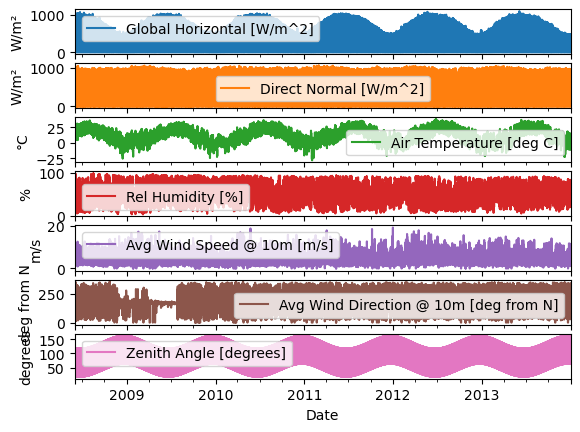

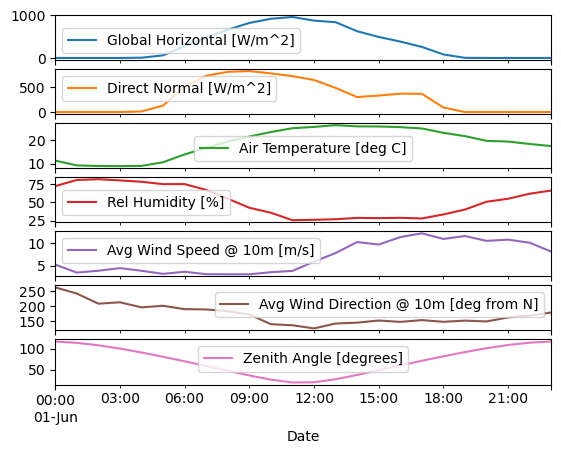

In [6]:
date_time = df.index

plot_features = df
plot_features.index = date_time
axes = plot_features.plot(subplots=True)

# Replace with the actual units for each of your DataFrame's columns
units = ['W/m²','W/m²', '°C', '%', 'm/s', 'deg from N','degrees']

# Set the y-axis label for each subplot to the corresponding unit
for ax, unit in zip(axes, units):
    ax.set_ylabel(unit)

plt.show()  # Display the plot


single_day=24
plot_features = df[:single_day]
plot_features.index = date_time[:single_day]
_ = plot_features.plot(subplots=True)

plt.show()


In [7]:
import copy
df = copy.deepcopy(df)
if 'Date' not in df.columns:
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Date'}, inplace=True)


# Create a continuous time index
df['Date'] = pd.to_datetime(df['Date'])
min_date, max_date = df['Date'].min(), df['Date'].max()
all_dates = pd.date_range(start=min_date, end=max_date, freq='H')  # Adjust 'freq' as per your data
continuous_df = pd.DataFrame({'Date': all_dates})
continuous_df['time_idx'] = continuous_df.index
df = continuous_df.merge(df, on='Date', how='left')

# Set group_id for a single time series
df['group_id'] = 0

# Extract time features
df['hour'] = df['Date'].dt.hour
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['month'] = df['month'].astype(str)
df['day'] = df['day'].astype(str)


In [8]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.10, shuffle=False)
# Define the TimeSeriesDataSet
max_encoder_length = 24*7*2
max_prediction_length = 24*7
# Set the random seed for reproducibility

seed_everything(42)
# ... [Your existing imports and data preparation code] ...

training = TimeSeriesDataSet(
    train_df,
    time_idx='time_idx',
    target='Direct Normal [W/m^2]',
    group_ids=['group_id'],  # Adjust based on your data
    min_encoder_length=24*7,
    max_encoder_length=max_encoder_length,
    min_prediction_length=24,
    max_prediction_length=max_prediction_length,
    static_categoricals=['month', 'day'],  # Adjust based on your static features
    static_reals=[],  # Add any static real features you have
    time_varying_known_reals=['hour'],  # Known time-varying features
    time_varying_unknown_reals=[
        'Global Horizontal [W/m^2]',
        'Air Temperature [deg C]',
        'Rel Humidity [%]',
        'Avg Wind Speed @ 10m [m/s]',
        'Avg Wind Direction @ 10m [deg from N]',
        'Zenith Angle [degrees]'
    ],
    target_normalizer=GroupNormalizer(groups=['group_id']),  # Adjust groupings as needed
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)


# Create validation dataset
batch_size = 32  # set this between 32 to 128
validation = TimeSeriesDataSet.from_dataset(training, test_df, predict=True, stop_randomization=True)
# create dataloaders for model

train_dataloader = training.to_dataloader(train=True, batch_size=batch_size)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10)



Global seed set to 42


In [9]:
warnings.filterwarnings("ignore")
best_tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=32,
    lstm_layers=2,
    attention_head_size=4,
    dropout=0.3,
    hidden_continuous_size=8,
    output_size=7,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=10,
)
print(f"Number of parameters in network: {best_tft.size()/1e3:.1f}k")


Number of parameters in network: 83.6k


In [10]:
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorboard as tb
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

tf.io.gfile = tf.io.gfile
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=20, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard




# Hyperparameter Tuning with Optuna (Sample setup, adjust as needed)

os.makedirs("/home/mehedi/Downloads/Hyperparameter", exist_ok=True)


# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=200,
    max_epochs=60,
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.5),
    trainer_kwargs={
        "limit_train_batches": 30.0},
    verbose=True,
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("/home/mehedi/Downloads/Hyperparameter/test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)




# Retrieve the best hyperparameters
best_params = study.best_trial.params
print("Best hyperparameters:", best_params)











model_params = {k: v for k, v in best_params.items() if k in TemporalFusionTransformer.from_dataset.__code__.co_varnames}

best_tft = TemporalFusionTransformer.from_dataset(
    training,
    lstm_layers=2,
    output_size=7,
    log_interval=10,
    reduce_on_plateau_patience=10,
    loss=QuantileLoss(),
    **model_params  # Unpack the hyperparameters
    # Add any other necessary parameters that were not part of the hyperparameter tuning
)

# Specify the training-related parameters in the Trainer
trainer = Trainer(
    max_epochs=50,
    gradient_clip_val=best_params.get("gradient_clip_val", 0.1),  # Use the best hyperparameter or a default value
    # Include other training-related parameters
    enable_checkpointing=True,
    enable_progress_bar=True,
)

# Train the model with the best hyperparameters
trainer.fit(
    best_tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

# Save the trained model (optional but recommended)
trainer.save_checkpoint("/home/mehedi/Downloads/Hyperparameter/best_tft_model.ckpt")

# Load the best trained model for prediction
best_tft = TemporalFusionTransformer.load_from_checkpoint("/home/mehedi/Downloads/Hyperparameter/best_tft_model.ckpt")
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)



prediction_lengths = [24, 168]  # Example lengths: 1 day, 7 days (assuming hourly data)
for length in prediction_lengths:
    # Ensure min_prediction_length is not greater than length
    min_pred_length = min(training.min_prediction_length, length)

    validation = TimeSeriesDataSet.from_dataset(
        training,
        df,
        predict=True,
        stop_randomization=True,
        min_prediction_length=min_pred_length,  # Adjusted min_prediction_length
        max_prediction_length=length
    )
    val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 20)
    predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
    rmse = RMSE()(predictions.output, predictions.y)
    print(f"RMSE for prediction length {length}: {rmse}")

[I 2024-08-30 22:48:30,184] A new study created in memory with name: no-name-1f7ef40b-5190-42c4-8870-7994a1d5ed46
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=60` reached.
[I 2024-08-30 22:54:41,425] Trial 0 finished with value: 44.537662506103516 and parameters: {'gradient_clip_val': 0.04350535960860021, 'hidden_size': 90, 'dropout': 0.315433964894843, 'hidden_continuous_size': 14, 'attention_head_size': 1, 'learning_rate': 0.05267658814839675}. Best is trial 0 with value: 44.537662506103516.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=60` reached.
[I 2024-08-30 22:58:09,065] Trial 1 finished with value: 42.106998443603516 and parameters: {'gradient_clip_val': 0.011747482386558093, 'hidden_siz

{'gradient_clip_val': 0.03214329784851394, 'hidden_size': 11, 'dropout': 0.30584009480315966, 'hidden_continuous_size': 9, 'attention_head_size': 2, 'learning_rate': 0.022012076920467853}
Best hyperparameters: {'gradient_clip_val': 0.03214329784851394, 'hidden_size': 11, 'dropout': 0.30584009480315966, 'hidden_continuous_size': 9, 'attention_head_size': 2, 'learning_rate': 0.022012076920467853}


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RMSE for prediction length 24: 180.5730438232422
RMSE for prediction length 168: 159.7532958984375


IndexError at idx=1: index 1 is out of bounds for dimension 0 with size 1
IndexError at idx=2: index 2 is out of bounds for dimension 0 with size 1
IndexError at idx=3: index 3 is out of bounds for dimension 0 with size 1
IndexError at idx=4: index 4 is out of bounds for dimension 0 with size 1


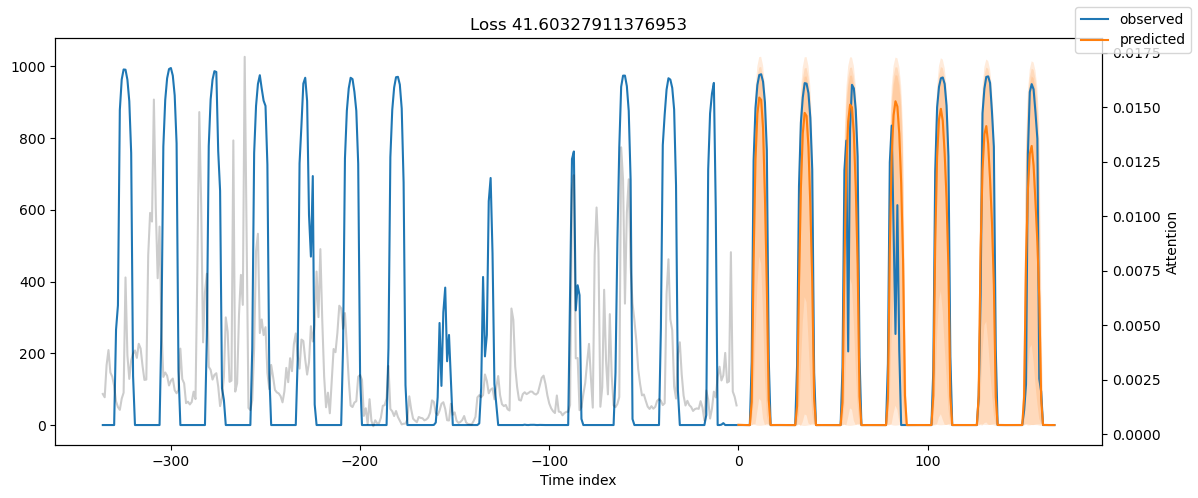

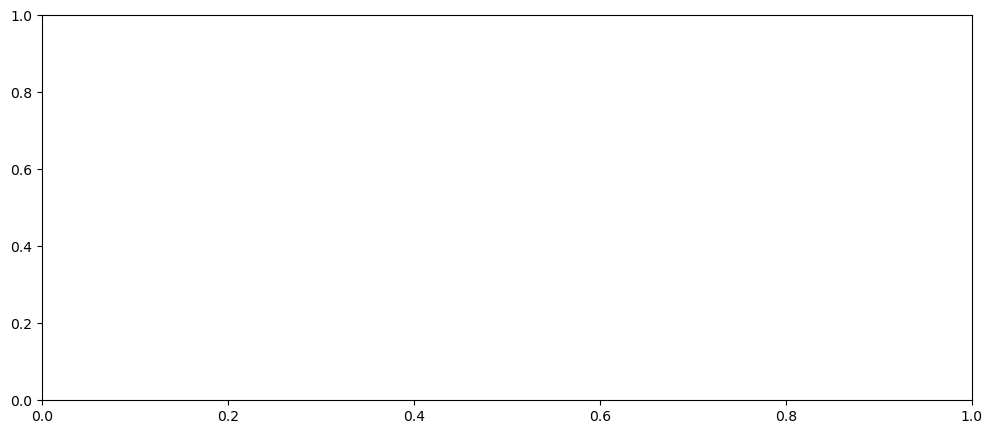

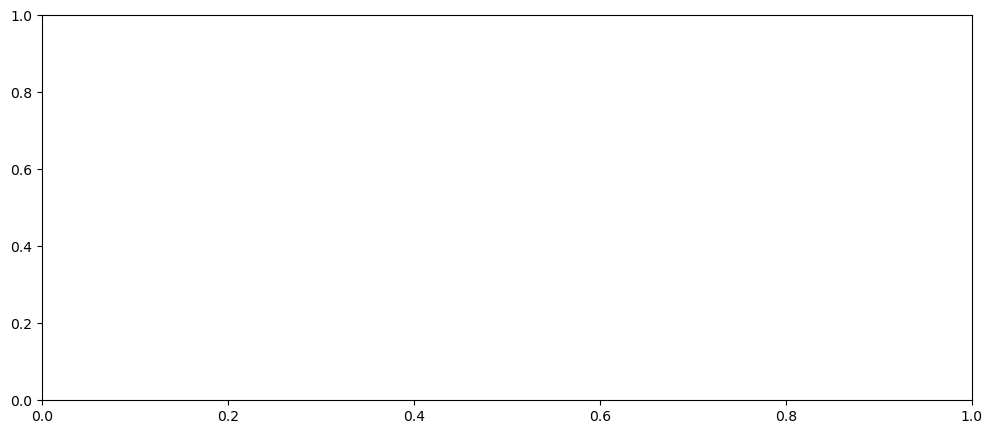

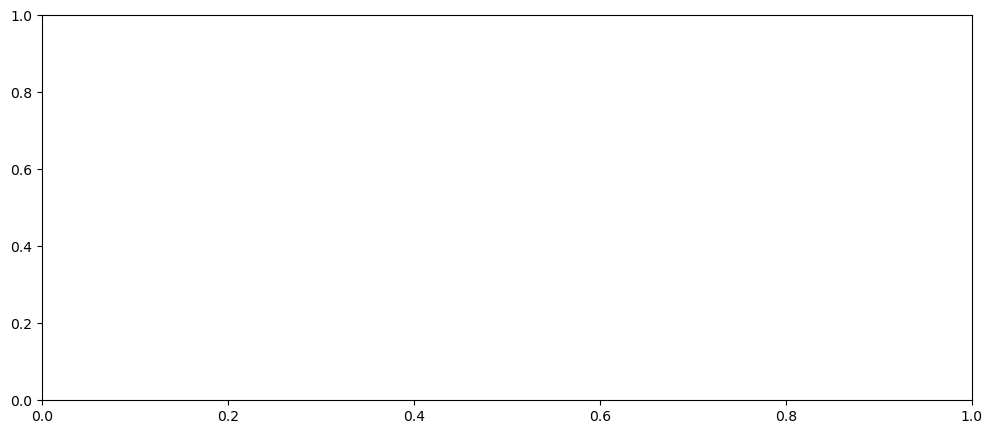

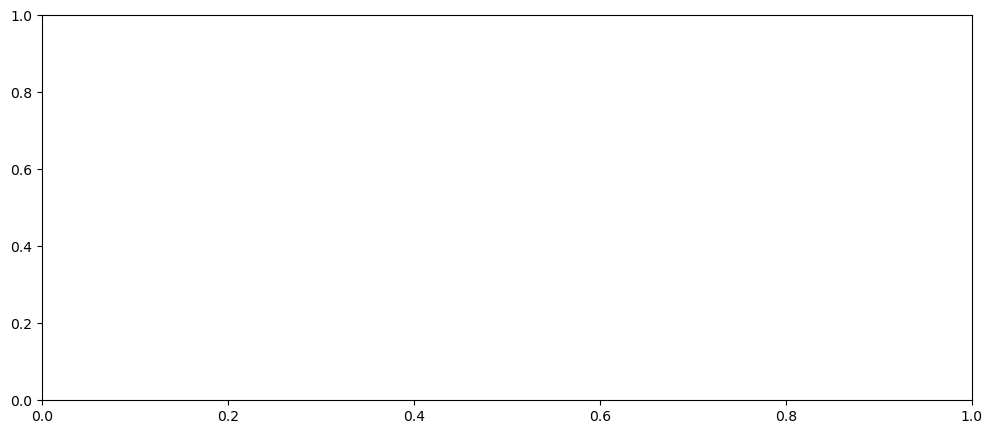

In [12]:

num_samples = len(raw_predictions)  # Get the number of samples in raw_predictions

for idx in range(min(num_samples, 5)):  # plot up to 10 examples or the number of samples available
    try:
        fig, ax = plt.subplots(figsize=(12, 5))
        best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True,ax=ax)
    except IndexError as e:
        print(f"IndexError at idx={idx}: {e}")


{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x325 with 1 Axes>,
 'encoder_variables': <Figure size 700x400 with 1 Axes>,
 'decoder_variables': <Figure size 700x250 with 1 Axes>}

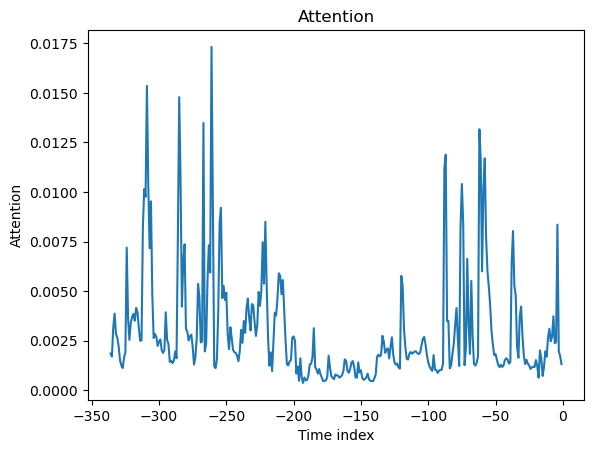

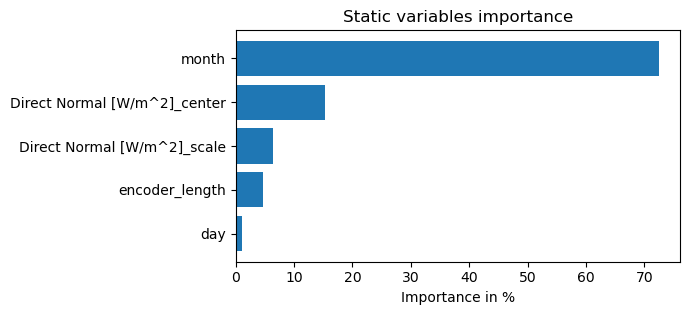

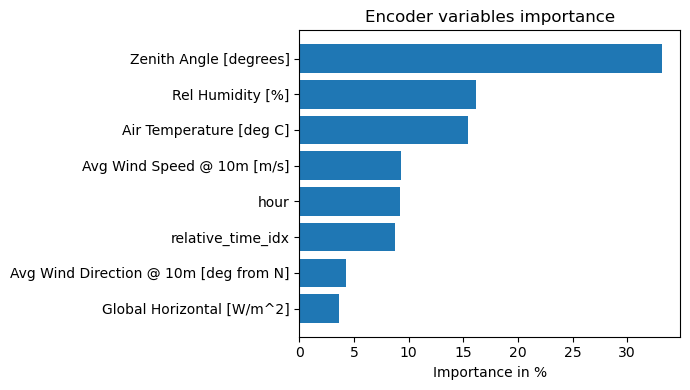

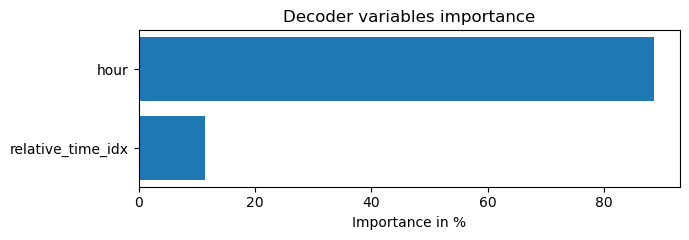

In [13]:
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
best_tft.plot_interpretation(interpretation)